In [47]:
import numpy as np

from network import Network
from fclayer import FCLayer
from activation_layer import ActivationLayer
from activations import tanh, derivative_tanh, relu, derivative_relu
from loss_function import mse, derivative_mse


In [41]:
from keras.datasets import mnist
from keras import utils

# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
print('x train shape is', x_train.shape)
print('y train shape is', y_train.shape)
print('x test shape is', x_test.shape)
print('y test shape is', y_test.shape)

x train shape is (60000, 28, 28)
y train shape is (60000,)
x test shape is (10000, 28, 28)
y test shape is (10000,)


In [43]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_train = x_train.astype('float32')
x_train /= 255
print('x train shape is', x_train.shape)
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = utils.to_categorical(y_train)
print('y train shape is', y_train.shape)

# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 28*28)
x_test = x_test.astype('float32')
x_test /= 255
print('x test shape is', x_test.shape)
y_test = utils.to_categorical(y_test)
print('y test shape is', y_test.shape)

x train shape is (60000, 784)
y train shape is (60000, 10)
x test shape is (10000, 784)
y test shape is (10000, 10)


In [44]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
# Network
net = Network()
net.add(FCLayer(28*28, 128))                # input_shape=(1, 28*28)    ;   output_shape=(1, 100)
net.add(ActivationLayer(relu, derivative_relu))
net.add(FCLayer(128, 10))                    # input_shape=(1, 50)       ;   output_shape=(1, 10)
net.add(SoftmaxLayer(10))

# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
net.use(mse, derivative_mse)
net.fit(x_train[0:1000], y_train[0:1000], epochs=40, learning_rate=0.1)

# test on 200 unseen samples
out = net.predict(x_test[:200])

epoch 1/40   error=0.114771
epoch 2/40   error=0.084437
epoch 3/40   error=0.069729
epoch 4/40   error=0.062914
epoch 5/40   error=0.054206
epoch 6/40   error=0.042566
epoch 7/40   error=0.034062
epoch 8/40   error=0.029040
epoch 9/40   error=0.023755
epoch 10/40   error=0.019833
epoch 11/40   error=0.012929
epoch 12/40   error=0.009324
epoch 13/40   error=0.007278
epoch 14/40   error=0.005762
epoch 15/40   error=0.005012
epoch 16/40   error=0.004397
epoch 17/40   error=0.003941
epoch 18/40   error=0.003747
epoch 19/40   error=0.003527
epoch 20/40   error=0.003477
epoch 21/40   error=0.003402
epoch 22/40   error=0.003312
epoch 23/40   error=0.003067
epoch 24/40   error=0.002871
epoch 25/40   error=0.002709
epoch 26/40   error=0.002391
epoch 27/40   error=0.002287
epoch 28/40   error=0.002135
epoch 29/40   error=0.002113
epoch 30/40   error=0.002066
epoch 31/40   error=0.002095
epoch 32/40   error=0.002032
epoch 33/40   error=0.002061
epoch 34/40   error=0.002030
epoch 35/40   error=0.0

In [54]:
# Convert one-hot encoded values to actual digits
def convert_to_digits(encoded_values):
    digits = []
    for encoded_value in encoded_values:
        # Find index of maximum value
        digit = np.argmax(encoded_value)
        digits.append(digit)
    return digits

# Convert true values to digits
true_digits = convert_to_digits(y_test[:200])

# Convert predicted values to digits
predicted_digits = []
for prediction in out:
    predicted_digits.append(convert_to_digits(prediction))
predicted_digits = [digit for sublist in predicted_digits for digit in sublist]

accuracy = sum((np.array(true_digits) == np.array(predicted_digits))) / len(true_digits)
print("Accuracy: ", accuracy * 100)

predicted values : 
Accuracy:  88.0


In [58]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward_propagate(output)
    return output

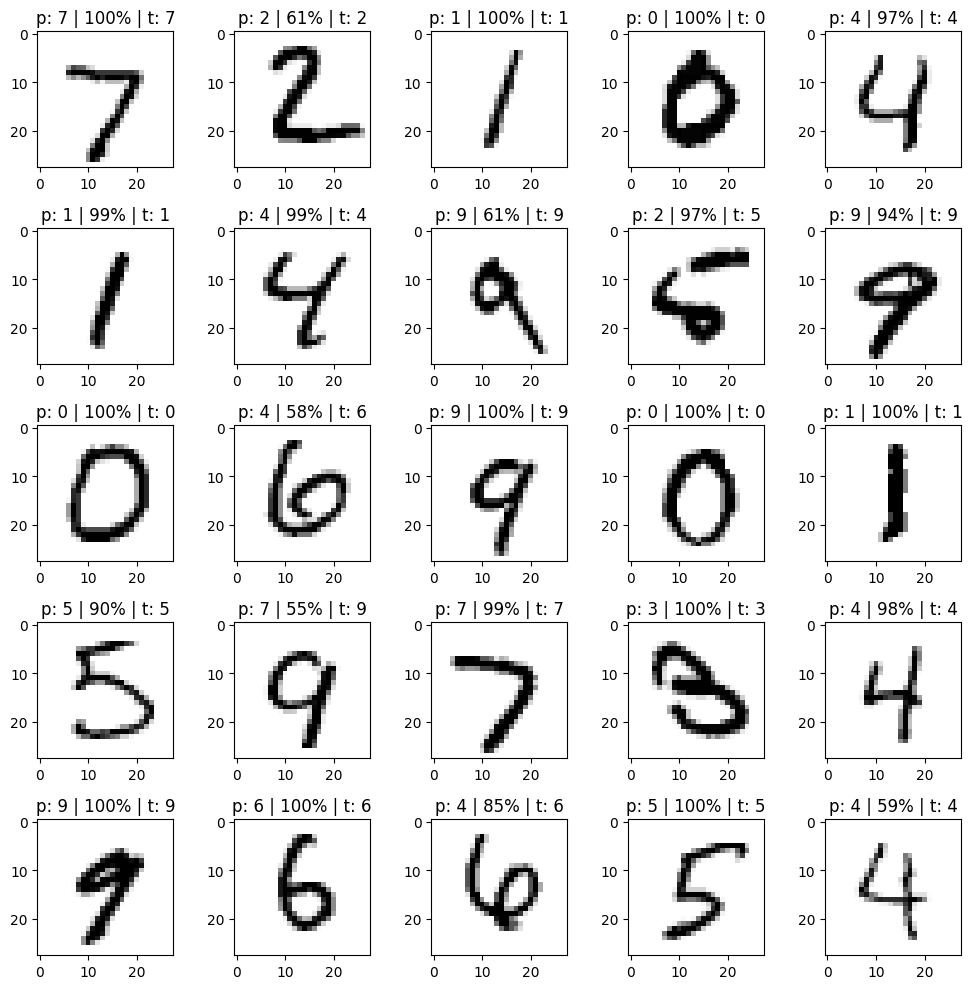

In [63]:
import matplotlib.pyplot as plt

samples = 25
rows = 5
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (test, true) in enumerate(zip(x_test[:samples], y_test[:samples])):
    row = i // cols
    col = i % cols

    image = np.reshape(test, (28, 28))
    axes[row, col].imshow(image, cmap='binary')
    pred = predict(net.layers, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    axes[row, col].set_title(f"p: {idx} | {round(pred[idx]*100)}% | t: {idx_true}")

plt.tight_layout()
plt.show()